##Visualize data

In [6]:
# Download data
!wget https://cloud.dfki.de/owncloud/index.php/s/Szp84psPPgcn5Zs/download/LIVECell_Huh7.zip

--2023-11-04 10:54:50--  https://cloud.dfki.de/owncloud/index.php/s/Szp84psPPgcn5Zs/download/LIVECell_Huh7.zip
Resolving cloud.dfki.de (cloud.dfki.de)... 193.175.65.15
Connecting to cloud.dfki.de (cloud.dfki.de)|193.175.65.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128425834 (122M) [application/zip]
Saving to: ‘LIVECell_Huh7.zip’

LIVECell_Huh7.zip   100%[===================>] 122.48M  17.7MB/s    in 7.4s    

2023-11-04 10:54:58 (16.5 MB/s) - ‘LIVECell_Huh7.zip’ saved [128425834/128425834]



In [18]:
# Unzip data
!unzip /content/LIVECell_Huh7.zip
!rm -r /content/__MACOSX
!mv /content/LIVECell_Huh7 data

In [19]:
import cv2
import json
import os

# Define your data directories
data_dir = 'data'
images_dir = os.path.join(data_dir, 'images')
train_dir = os.path.join(images_dir, 'train')
test_dir = os.path.join(images_dir, 'test')
train_json_file =  os.path.join(data_dir, 'train.json')
test_json_file = os.path.join(data_dir, 'test.json')

# Load JSON files
with open(train_json_file, 'r') as train_file:
    train_data = json.load(train_file)

with open(test_json_file, 'r') as test_file:
    test_data = json.load(test_file)


In [32]:
train_data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [33]:
train_data['images'][0]

{'id': 1017382,
 'width': 704,
 'height': 520,
 'file_name': 'Huh7_Phase_A10_2_03d04h00m_1.tif',
 'original_filename': 'Huh7_Phase_A10_2_03d04h00m_1.png',
 'url': 'https://darwin.v7labs.com/api/images/870202/original'}

In [34]:
train_data['annotations'][0]

{'id': 1017383,
 'image_id': 1017382,
 'category_id': 1,
 'segmentation': [[592.3,
   266.24,
   592.3,
   266.88,
   592.3,
   269.9,
   591.22,
   272.7,
   589.07,
   277.01,
   586.48,
   283.68,
   584.97,
   289.07,
   583.9,
   292.3,
   583.25,
   297.47,
   583.03,
   307.38,
   584.33,
   314.92,
   585.19,
   319.22,
   589.07,
   328.27,
   589.07,
   332.8,
   588.2,
   334.73,
   590.36,
   337.96,
   591.65,
   337.96,
   594.24,
   339.26,
   595.74,
   340.77,
   597.68,
   345.72,
   599.19,
   349.81,
   600.7,
   353.26,
   603.07,
   356.92,
   606.94,
   359.07,
   616.21,
   364.24,
   618.15,
   365.97,
   623.32,
   367.91,
   625.47,
   367.91,
   628.7,
   367.26,
   633.65,
   367.69,
   636.89,
   367.69,
   640.12,
   367.26,
   642.27,
   366.83,
   644.64,
   366.4,
   648.09,
   366.18,
   650.46,
   366.18,
   654.76,
   366.83,
   656.7,
   365.75,
   658.64,
   365.11,
   661.23,
   364.24,
   663.6,
   362.52,
   663.6,
   360.58,
   664.89,
   357.

In [35]:
train_data['categories']

[{'supercategory': 'cell', 'id': 1, 'name': 'cell'}]

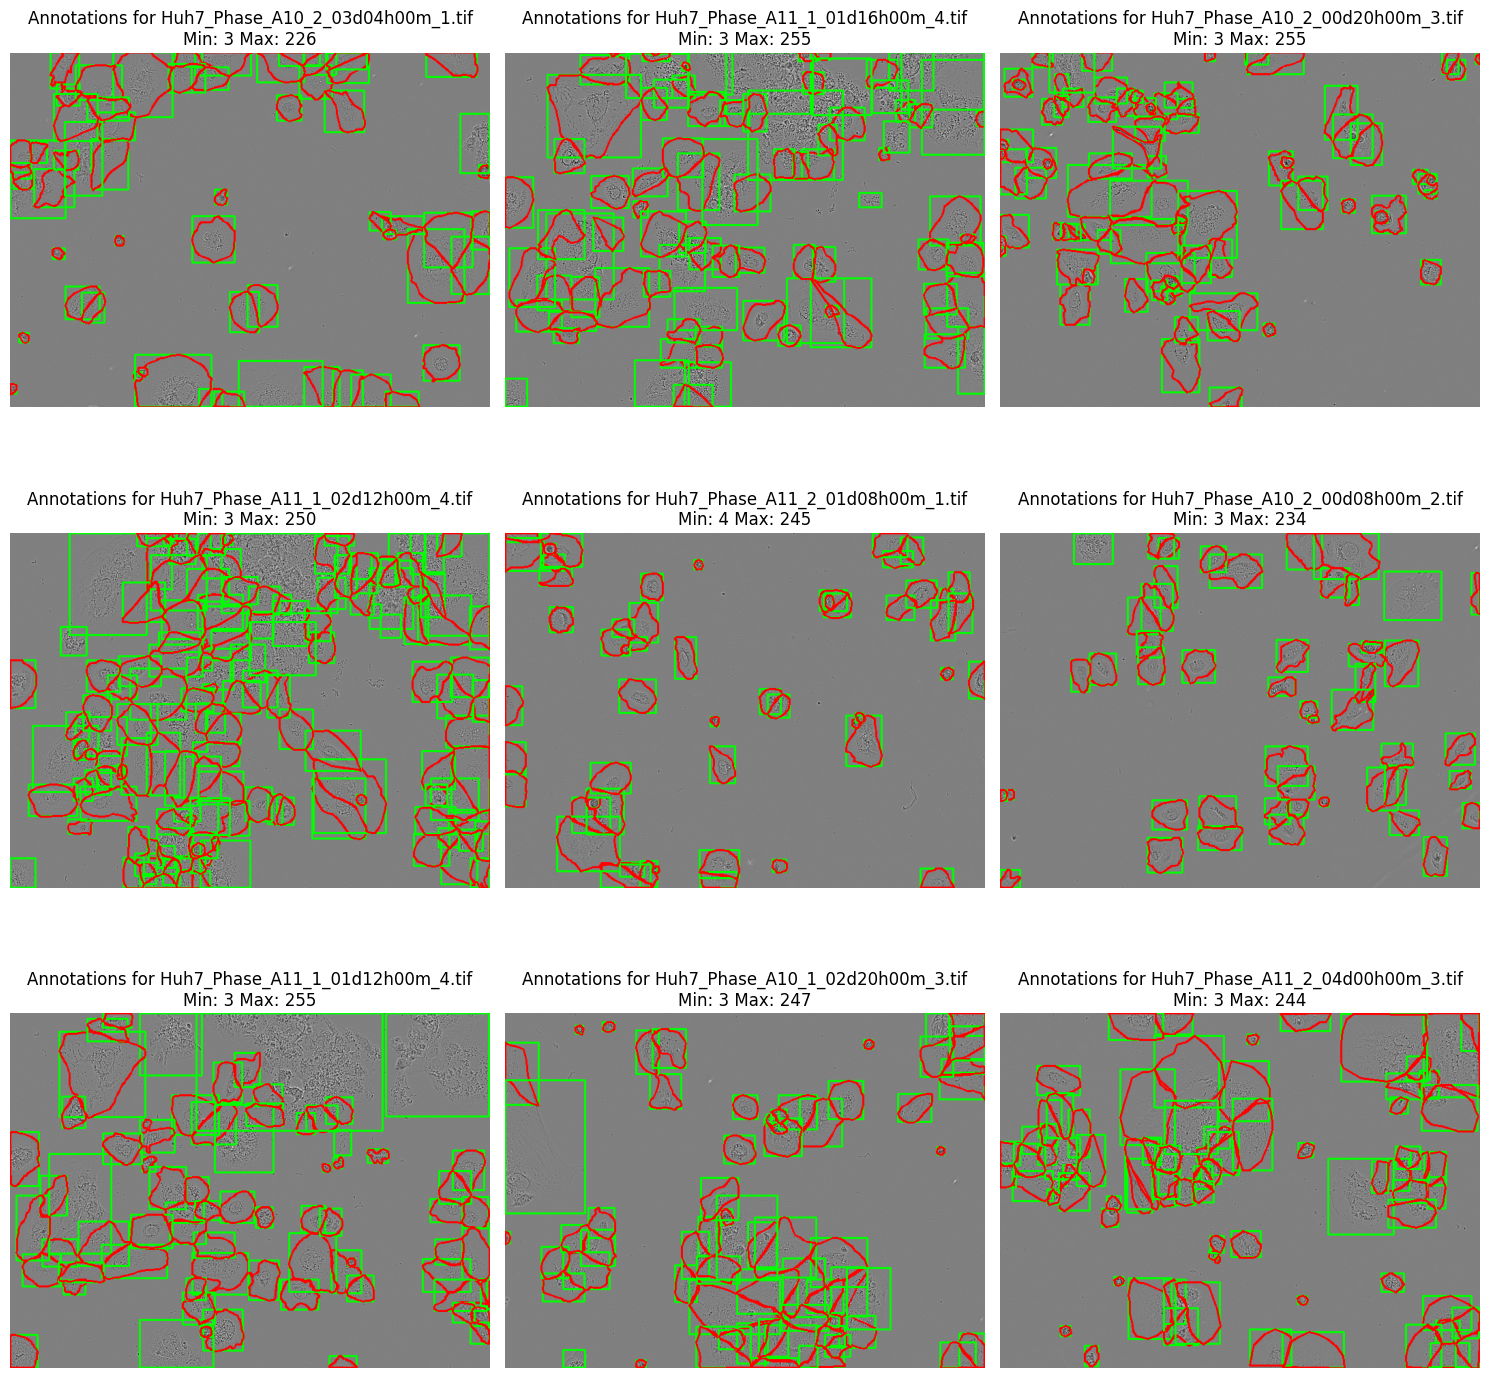

In [81]:
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define a function to visualize annotations
def visualize_annotations(data, image_id, ax):
    image_data = data['images'][image_id]
    file_name = image_data['file_name']
    image = cv2.imread(os.path.join(train_dir, file_name))

    # Create a blank canvas for annotations
    annotations_image = image.copy()

    # Get annotations for the specific image
    for annotation in data['annotations']:
        if annotation['image_id'] == image_data['id']:
            category_id = annotation['category_id']

            bbox = annotation['bbox']
            x, y, width, height = map(int, bbox)
            cv2.rectangle(annotations_image, (x, y), (x + width, y + height), (0, 255, 0), 2)

            segmentation = annotation['segmentation']
            for polygon in segmentation:
                valid_points = [p for p in polygon if isinstance(p, (int, float))]
                if len(valid_points) % 2 != 0:
                    continue  # Skip incomplete points

                points = [int(p) for p in valid_points]
                points = [(points[i], points[i+1]) for i in range(0, len(points), 2)]
                pts = [(int(x), int(y)) for x, y in points if x >= 0 and y >= 0]

                # Convert pts to a NumPy array
                pts = np.array(pts, np.int32)
                pts = pts.reshape((-1, 1, 2))

                cv2.polylines(annotations_image, [pts], isClosed=True, color=(0, 0, 255), thickness=2)

    # Display the image with annotations
    ax.imshow(cv2.cvtColor(annotations_image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(f'Annotations for {file_name}\nMin: {image.min()} Max: {image.max()}')

# Create a subplot with 3x3 grid
plt.figure(figsize=(15, 15))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    visualize_annotations(train_data, i - 1, plt.gca())

plt.tight_layout()
plt.show()